In [306]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from scipy.stats import linregress

In [198]:
for old_image_name in [x for x in os.listdir(os.curdir) if ".JPG" in x]:
    if "_" in old_image_name:
        new_image_name = old_image_name.split("_")[1]
        os.rename(old_image_name, new_image_name)

In [199]:
images = [x for x in os.listdir(os.curdir) if ".JPG" in x]
images.sort()

In [200]:
exposure_times = [2.5,2,1.6,1.3,1,.8,.6,.5,.4,.3,1./4,1./5,1./6,1./8,1./10,1./13,1./15,1./20,1./25,1./30,1./40,1./50,1./60,1./80,1./100,1./125,1./160,1./200,1./250,1./320,1./400]
list.reverse(exposure_times)

In [201]:
img_exposure_pairs = zip(images,exposure_times)

In [202]:
img_exposure_pairs

[('0001.JPG', 0.0025),
 ('0002.JPG', 0.003125),
 ('0003.JPG', 0.004),
 ('0004.JPG', 0.005),
 ('0005.JPG', 0.00625),
 ('0006.JPG', 0.008),
 ('0007.JPG', 0.01),
 ('0008.JPG', 0.0125),
 ('0009.JPG', 0.016666666666666666),
 ('0010.JPG', 0.02),
 ('0011.JPG', 0.025),
 ('0012.JPG', 0.03333333333333333),
 ('0013.JPG', 0.04),
 ('0014.JPG', 0.05),
 ('0015.JPG', 0.06666666666666667),
 ('0016.JPG', 0.07692307692307693),
 ('0017.JPG', 0.1),
 ('0018.JPG', 0.125),
 ('0019.JPG', 0.16666666666666666),
 ('0020.JPG', 0.2),
 ('0021.JPG', 0.25),
 ('0022.JPG', 0.3),
 ('0023.JPG', 0.4),
 ('0024.JPG', 0.5),
 ('0025.JPG', 0.6),
 ('0026.JPG', 0.8),
 ('0027.JPG', 1),
 ('0028.JPG', 1.3),
 ('0029.JPG', 1.6),
 ('0030.JPG', 2),
 ('0031.JPG', 2.5)]

In [211]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [203]:
mean_Rs = []
mean_Gs = []
mean_Bs = []
for img_path, exposure in img_exposure_pairs:   
    img = cv.imread(img_path)
    x,y,_ = img.shape
    mid_x = x/2
    mid_y = y/2
    crop_factor = 100
    low_x, hi_x = mid_x-crop_factor, mid_x+crop_factor
    low_y, hi_y = mid_y-crop_factor, mid_y+crop_factor
    RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    cropped_img = RGB_img[low_x:hi_x,low_y:hi_y]
    mean, std = cv.meanStdDev(cropped_img)
    mean_Rs.append(mean[0][0])
    mean_Gs.append(mean[1][0])
    mean_Bs.append(mean[2][0])
    #plt.imshow(RGB_img)
    #hist = cv.calcHist([cropped_img],[0],None,[256],[0,256])
    #plt.title("Exposure time: {0} second(s), Mean pixel value: {1}".format(exposure,mean))
    #plt.show()
    #plt.plot(hist)
    #plt.show()

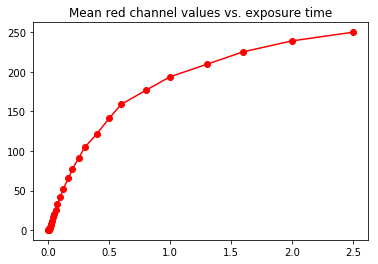

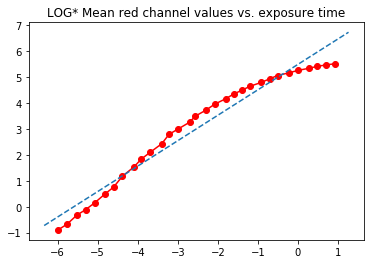

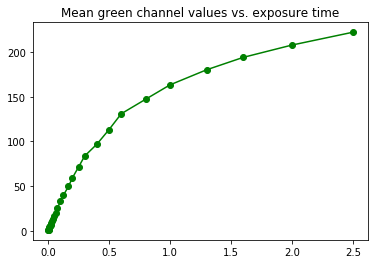

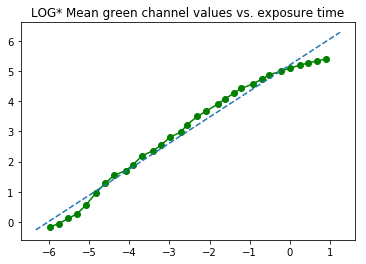

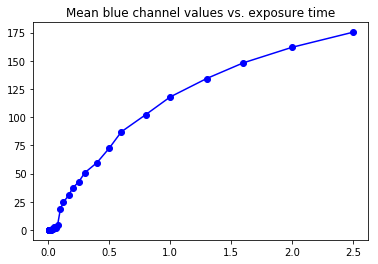

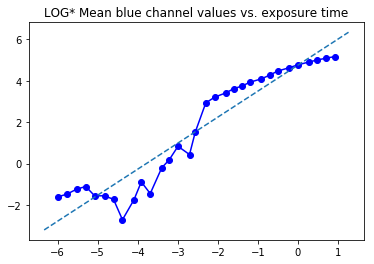

In [268]:
plt.plot(exposure_times, mean_Rs, color="red", marker="o")
plt.title("Mean red channel values vs. exposure time")
plt.show()
plt.plot(np.log(exposure_times), np.log(mean_Rs), color="red", marker="o")

linearized_R = linregress(np.log(exposure_times), np.log(mean_Rs))
abline(linearized_R.slope, linearized_R.intercept)

plt.title("LOG* Mean red channel values vs. exposure time")
plt.show()
plt.plot(exposure_times, mean_Gs, color="green", marker="o")
plt.title("Mean green channel values vs. exposure time")
plt.show()
plt.plot(np.log(exposure_times), np.log(mean_Gs), color="green", marker="o")

linearized_G = linregress(np.log(exposure_times), np.log(mean_Gs))
abline(linearized_G.slope, linearized_G.intercept)

plt.title("LOG* Mean green channel values vs. exposure time")
plt.show()
plt.plot(exposure_times, mean_Bs, color="blue", marker="o")
plt.title("Mean blue channel values vs. exposure time")
plt.show()
plt.plot(np.log(exposure_times), np.log(mean_Bs), color="blue", marker="o")

linearized_B = linregress(np.log(exposure_times), np.log(mean_Bs))
abline(linearized_B.slope, linearized_B.intercept)

plt.title("LOG* Mean blue channel values vs. exposure time")
plt.show()

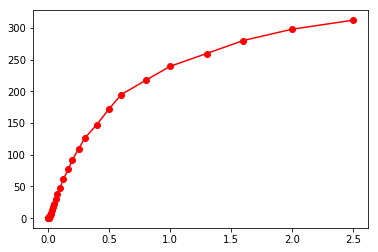

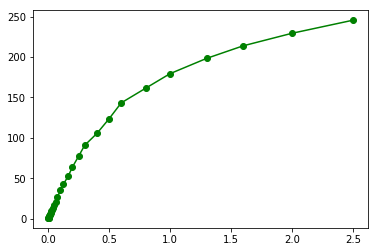

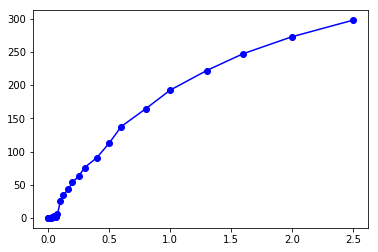

In [298]:
linearized_R = linregress(np.log(exposure_times), np.log(mean_Rs))
R_a_value = linearized_R.rvalue**2
R_g_value = (1/R_a_value)
modified_mean_Rs = [x**(R_g_value) for x in mean_Rs]
plt.plot(exposure_times, modified_mean_Rs, color="red", marker="o")
plt.show()

linearized_G = linregress(np.log(exposure_times), np.log(mean_Gs))
G_a_value = linearized_G.rvalue**2
G_g_value = (1/G_a_value)
modified_mean_Gs = [x**(G_g_value) for x in mean_Gs]
plt.plot(exposure_times, modified_mean_Gs, color="green", marker="o")
plt.show()

linearized_B = linregress(np.log(exposure_times), np.log(mean_Bs))
B_a_value = linearized_B.rvalue**2
B_g_value = (1/B_a_value)
modified_mean_Bs = [x**(B_g_value) for x in mean_Bs]
plt.plot(exposure_times, modified_mean_Bs, color="blue", marker="o")
plt.show()

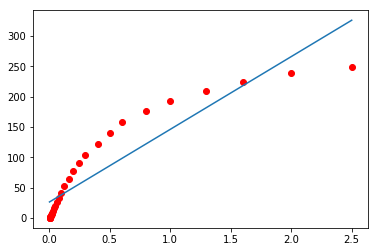

In [314]:
linreg = linear_model.LinearRegression()

train_x = np.array(exposure_times).reshape(len(exposure_times),1)
train_y = np.array(mean_Rs).reshape(len(mean_Rs),1)

linreg.fit(train_x, train_y)
g = linreg.coef_[0][0]
fited_x = train_x
fited_y = linreg.predict(fited_x)

plt.scatter(exposure_times,mean_Rs,color ='Red')
plt.plot(fited_x,fited_y)